<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction To Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #559CFF; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Data exploring and preprocessing 
</div>

## Import necessary libraries

In [27]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring your data

### Read raw data from file

In [2]:
raw_df = pd.read_csv('../Data/raw_data.csv', sep=',',engine='python', encoding='utf-8')

In [3]:
raw_df.head(5)

,name,field,enrollment,language,rating,level,duration,description,skill,instructor,offered by
0,Cyber Threat Intelligence,Information Technology > Security,"52,299 already enrolled",Taught in English,4.7,Beginner level,25 hours (approximately),NaN,"Cybersecurity, network defensive tactics, thre...",4.5 {'IBM Skills Network Team'},IBM
1,Network Security,Information Technology > Security,"6,909 already enrolled",Taught in English,4.7,Beginner level,8 hours (approximately),NaN,"Cyberattacks, Network Security, Threat",4.9 {'(ISC)² Education & Training'},ISC2
2,Security Principles,Information Technology > Security,"12,400 already enrolled",Taught in English,4.7,Beginner level,5 hours (approximately),NaN,"Risk, security, governance, Information Assurance",4.6 {'(ISC)² Education & Training'},ISC2
3,"Grow Your Business with Goldman Sachs 10,000 W...",Business > Entrepreneurship,"50,738 already enrolled",Taught in English,4.8,NaN,Approx. 4 hours to complete,Develop your community and discuss the value o...,None,None,None
4,Explore a potential growth opportunity for yo...,"Opportunity Identification, Strategic Thinking...","4.8 {'Mori Taheripour', 'Goldman Sachs 10,000...",Goldman Sachs,NaN,None,None,None,None,None,None


### What does each column mean?
    - name: Name of course.
    - field: field or domain knowledge which course provides.
    - enrollment: number of student enter in course.
    - language: language provided by the course.
    - rating: average rating of this course.
    - level: suggested level of learners to know whether they are suitable with this course or not.
    - duration: approximate time to complete this course.
    - description: describe the content and topics student can learn in the course.
    - skill: some skill, technical that student gain after complete the course.
    - instructor: teacher who teach this course.
    - offered by: university provide this course.

### How many rows and how many columns does the raw data have? 

In [4]:
raw_df.shape

(8014, 11)

### Are there any columns need to drop?

There are two columns `description`, `skill`. Both of them has high ratio of missing value (about 50%) and values in each column are long strings which cause difficulty to process or to get keywords so we will drop these two columns.

In [5]:
# Drop description, skill columns
raw_df.drop(['description','skill'], axis = 1, inplace=True)

### Does the raw data have duplicate rows?

Check data if they has duplicated rows then store in the variable `is_duplicated`. If the variable is True, drop these rows (the first line is not counted as repeated).

In [6]:
is_duplicate = raw_df.duplicated().any()
if is_duplicate:
    print(f"Data have duplicated. Please de-deduplicate it.!")
else:
    print(f"Data have no duplicated row.")

Data have duplicated. Please de-deduplicate it.!


### Delete duplicated row

In [7]:
# Drop dupliacated row
raw_df.drop_duplicates(inplace=True)

In [8]:
raw_df.shape

(8010, 9)

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? 

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8010 entries, 0 to 8013
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        8004 non-null   object 
 1   field       7986 non-null   object 
 2   enrollment  5468 non-null   object 
 3   language    7991 non-null   object 
 4   rating      5718 non-null   float64
 5   level       6640 non-null   object 
 6   duration    7975 non-null   object 
 7   instructor  7959 non-null   object 
 8   offered by  7959 non-null   object 
dtypes: float64(1), object(8)
memory usage: 625.8+ KB


### Process unsuitable type to numeric

- First, we will parse the `duration`and `enrollment` columns to get their numeric values. Then both will convert to `int`.

- We also split `instructor` column.
    - Let's take a look at this columns, it has a pair of values: rating score of instructor and instructor.
    - We will split it into two columns: `instructor ` and  `instructor_rate`.
    - They have `object` and `float` respectively.

In [10]:
# Get the numeric of enrollment
raw_df['enrollment'] = raw_df['enrollment'].replace(to_replace=[None], value=np.nan)
raw_df['enrollment'] = raw_df['enrollment'].str.extract('(\d+,\d+)')
try:
    raw_df['enrollment'] = pd.to_numeric(raw_df['enrollment'].replace(',', '', regex=True), errors='coerce').astype('Int64')
except ValueError:
    raw_df['enrollment'] = None

# Get the numeric of duration
raw_df['duration'] = raw_df['duration'].replace(to_replace=[None], value=np.nan)
raw_df['duration'] = raw_df['duration'].str.extract('(\d+)')
try:
    raw_df['duration'] = pd.to_numeric(raw_df['duration'], errors='coerce').astype('Int64')
except ValueError:
    raw_df['duration'] = None

In [11]:
# Split instructor  into  instructor and  instructor_rate
raw_df['instructor_rate'] = raw_df['instructor'].str.replace(r'\{(.+)\}', '', regex=True)
raw_df['instructor_rate'] = raw_df['instructor_rate'].str.strip()

raw_df['instructor'] = raw_df['instructor'].str.extract(r'\{(.+)\}')
raw_df['instructor'] = raw_df['instructor'].str.replace("'", '')

# Astype 'instructor_rate' to float
raw_df['instructor_rate'] = pd.to_numeric(raw_df['instructor_rate'], errors='coerce')
raw_df['instructor_rate'] = raw_df['instructor_rate'].astype(float)


In [12]:
#test 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8010 entries, 0 to 8013
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8004 non-null   object 
 1   field            7986 non-null   object 
 2   enrollment       5453 non-null   Int64  
 3   language         7991 non-null   object 
 4   rating           5718 non-null   float64
 5   level            6640 non-null   object 
 6   duration         7975 non-null   Int64  
 7   instructor       7959 non-null   object 
 8   offered by       7959 non-null   object 
 9   instructor_rate  5121 non-null   float64
dtypes: Int64(2), float64(2), object(6)
memory usage: 704.0+ KB


### We completed to convert numeric columns. 

### For each column with numeric data type, how are the values distributed?

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

The results will be saved to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [13]:
def missing_ratio(df):
    return (df.isnull().sum()*100/len(df)).round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def median(df):
    return df.quantile(0.5).round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [14]:
# YOUR CODE HERE
num_col_info_df = raw_df.select_dtypes(include=np.number)
num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

In [15]:
num_col_info_df

,enrollment,rating,duration,instructor_rate
missing_ratio,31.9,28.6,0.4,36.1
min,1002.0,3.0,1.0,1.4
lower_quartile,4710.0,4.6,8.0,4.6
median,13220.0,4.7,13.0,4.7
upper_quartile,36281.0,4.8,20.0,4.8
max,973927.0,5.0,127.0,5.0


Let's take a look at the table. We have there columns has quite high missing ratio but for futher processing (training, analyzing..) we will **drop** all rows that have none rating value.

In [16]:
# drop rows with none rating
raw_df.dropna(subset=['rating'], inplace=True)
raw_df.shape 

(5718, 10)

Now, take a look again DataFrame `num_col_info_df`.

In [17]:
# YOUR CODE HERE
num_col_info_df = raw_df.select_dtypes(include=np.number)
num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,enrollment,rating,duration,instructor_rate
missing_ratio,7.7,0.0,0.0,11.2
min,1002.0,3.0,1.0,1.7
lower_quartile,5124.0,4.6,9.0,4.6
median,13926.0,4.7,14.0,4.7
upper_quartile,37704.0,4.8,20.0,4.8
max,973927.0,5.0,127.0,5.0


After remove useless rows, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

- Fill `enrollment` and `instructor_rate` by median.

In [18]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    """Filling missing features from Pandas dataframe
    
    The first, you need to replace all None values with NaN, fillna only works on nans.
    
    After that, you replace all NaN values with the mean of the column values.

    Args:
        df (pd.DataFrame): Input dataframe for processing.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    numeric_cols = df.select_dtypes(exclude='object').columns   # choose numeric columns
    df[numeric_cols] = df[numeric_cols].replace(to_replace=[None], value=np.nan)
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    return df

In [19]:
raw_df = filling_missing_value(df = raw_df)

In [20]:
# TEST
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,enrollment,rating,duration,instructor_rate
missing_ratio,0.0,0.0,0.0,0.0
min,1002.0,3.0,1.0,1.7
lower_quartile,5612.5,4.6,9.0,4.6
median,13926.0,4.7,14.0,4.7
upper_quartile,34392.0,4.8,20.0,4.8
max,973927.0,5.0,127.0,5.0


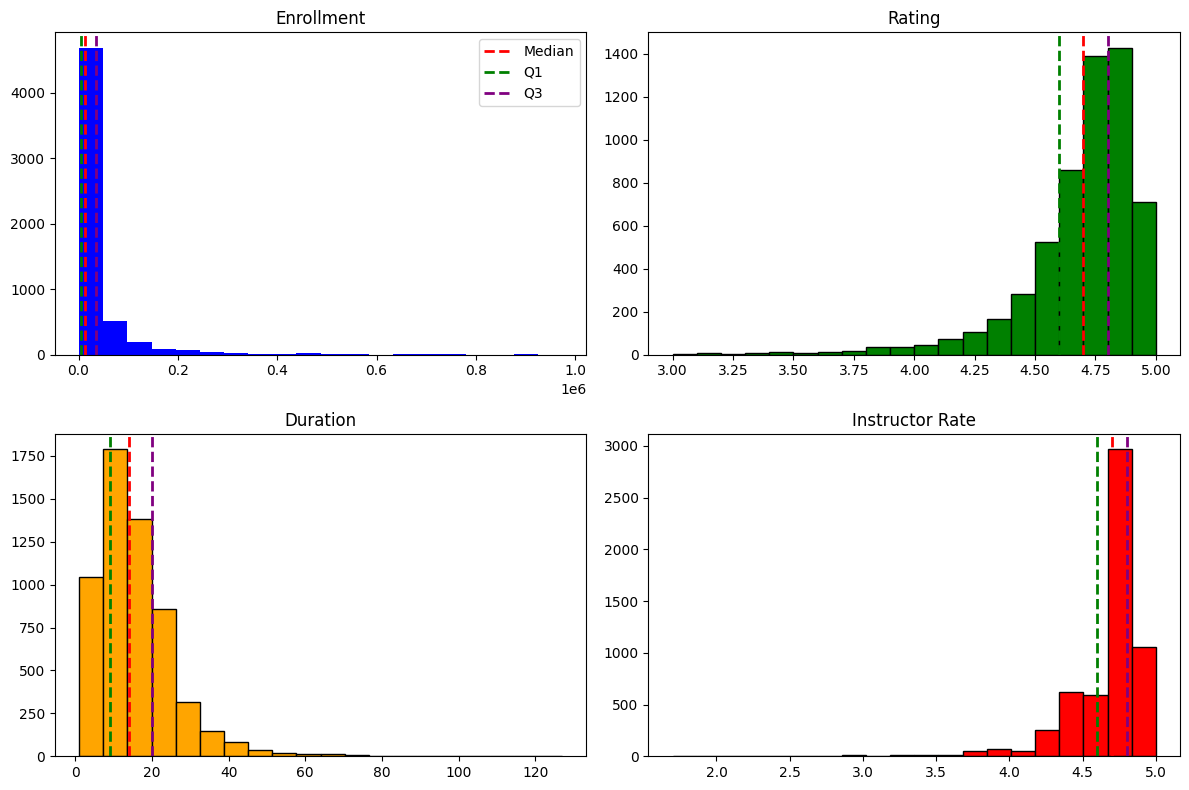

In [31]:
plt.figure(figsize=(12, 8))

# Histogram 'enrollment'
plt.subplot(2, 2, 1)
plt.hist(raw_df['enrollment'], bins=20, color='blue')

median = raw_df['enrollment'].median()
q1 = raw_df['enrollment'].quantile(0.25)
q3 = raw_df['enrollment'].quantile(0.75)

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label='Q3')

plt.title('Enrollment')
plt.legend()

# Histogram 'rating'
plt.subplot(2, 2, 2)
plt.hist(raw_df['rating'], bins=20, color='green', edgecolor='black')
median = raw_df['rating'].median()
q1 = raw_df['rating'].quantile(0.25)
q3 = raw_df['rating'].quantile(0.75)

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label='Q3')
plt.title('Rating')

# Histogram 'duration'
plt.subplot(2, 2, 3)
plt.hist(raw_df['duration'], bins=20, color='orange', edgecolor='black')
median = raw_df['duration'].median()
q1 = raw_df['duration'].quantile(0.25)
q3 = raw_df['duration'].quantile(0.75)

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label='Q3')
plt.title('Duration')

# Histogram 'instructor_rate'
plt.subplot(2, 2, 4)
plt.hist(raw_df['instructor_rate'], bins=20, color='red', edgecolor='black')
median = raw_df['instructor_rate'].median()
q1 = raw_df['instructor_rate'].quantile(0.25)
q3 = raw_df['instructor_rate'].quantile(0.75)

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label='Q3')
plt.title('Instructor Rate')

plt.tight_layout()
plt.show()


### Preprocess non numeric columns

Value in `field` column has the same format: `general_field` > `specitfy_field`.
- For analyzing, we will **split** `field` into two columns `general` and `specify`.
- Then drop `field` columns

In [32]:
# split into two columns
raw_df[['general', 'specify']] = raw_df['field'].str.split(' > ', expand = True)

# drop field column
raw_df.drop(['field'], axis= 1,inplace=True)

In [33]:
# test 
raw_df.columns

Index(['name', 'enrollment', 'language', 'rating', 'level', 'duration',
       'instructor', 'offered by', 'instructor_rate', 'general', 'specify'],
      dtype='object')

### For each column with a non-numeric data type, how are the values distributed?

For columns with non-numeric data types, calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. 
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

Results are saves to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"



In [34]:
def num_values(df):
    return df.nunique()
def value_ratios(df):
    value_counts = df.value_counts(normalize=True)*100
    value_ratios = value_counts.round(1).to_dict()
    value_ratios = dict(sorted(value_ratios.items(), key=lambda item: item[1], reverse=True))
    return value_ratios

In [35]:
pd.set_option('display.max_colwidth', 100) # For clearly

In [36]:
# YOUR CODE HERE
cat_col_info_df = raw_df.select_dtypes(include='object')

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,name,language,level,instructor,offered by,general,specify
missing_ratio,0.0,0.0,20.6,0.3,0.3,0.0,0.0
num_values,5703,20,3,3030,331,11,45
value_ratios,"{'Software Defined Networking': 0.0, 'Supply Chain Planning': 0.0, 'Competitive Strategy': 0.0, ...","{'Taught in English': 75.2, 'Taught in Spanish': 11.2, 'Taught in Portuguese (Brazilian)': 2.9, ...","{'Beginner level': 65.0, 'Intermediate level': 31.1, 'Advanced level': 3.9}","{'Google Career Certificates': 3.8, 'Google Cloud Training': 3.4, 'Alfaisal.KLD': 1.1, ' Microso...","{'Google': 4.2, 'Google Cloud': 3.4, 'University of Colorado Boulder': 3.3, 'University of Illin...","{'Business': 25.6, 'Computer Science': 14.7, 'Data Science': 11.0, 'Health': 10.4, 'Physical Sci...","{'Leadership and Management': 7.7, 'Software Development': 6.8, 'Data Analysis': 6.5, 'Business ..."


### Fill missing value in categorical columns

In `cat_col_info_df` DataFrame above, column `level` has three unique values and still has missing. We will fill None with `Other`.

In [37]:
# fill none by 'Other'
raw_df['level'] = raw_df['level'].fillna('Other')

In [38]:
# test
raw_df['level'].isnull().sum()

0

In [40]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5718 entries, 0 to 8012
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5718 non-null   object 
 1   enrollment       5718 non-null   Int64  
 2   language         5718 non-null   object 
 3   rating           5718 non-null   float64
 4   level            5718 non-null   object 
 5   duration         5718 non-null   Int64  
 6   instructor       5703 non-null   object 
 7   offered by       5703 non-null   object 
 8   instructor_rate  5718 non-null   float64
 9   general          5717 non-null   object 
 10  specify          5717 non-null   object 
dtypes: Int64(2), float64(2), object(7)
memory usage: 547.2+ KB


### Which columns can be optimized?

Let's take a look at data.

In [ ]:
raw_df.head(4)

In `language` and `level` columns, we can reduce the size of data by removing some words like: 'Taught in', 'level'. Without these words, our data are still meaningful. 

In [ ]:
# remove useless words
raw_df['level'] = raw_df['level'].str.replace('level', '').str.strip()
raw_df['language'] = raw_df['language'].str.replace('Taught in', '').str.strip()

### Save processed data 

Reorder columns for easily understanding

In [ ]:
col = ['name','general','specify','enrollment',
       'language','rating','level','duration',
       'instructor','instructor_rate','offered by']
raw_df = raw_df[col]

In [ ]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

In [ ]:
# save to csv
raw_df.to_csv('../Data/processed_data.csv', index=False)